In [1]:
# personally made imports
import acquire_p

# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#clean look
import warnings
warnings.filterwarnings("ignore")

get_bilancino_data()
prepare(df)


In [2]:
lake = acquire_p.get_bilancino_data()

In [3]:
lake = acquire_p.prepare(lake)

In [4]:
cat_col = lake.columns

In [5]:
def visual(df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(cat_col):
        plot_number = i + 1
        l= len(cat_col)
        plt.subplot(9,1,plot_number)
        sns.lineplot(x = df.index, y = df[col])
        plt.suptitle('---------------------20XX-------------------')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

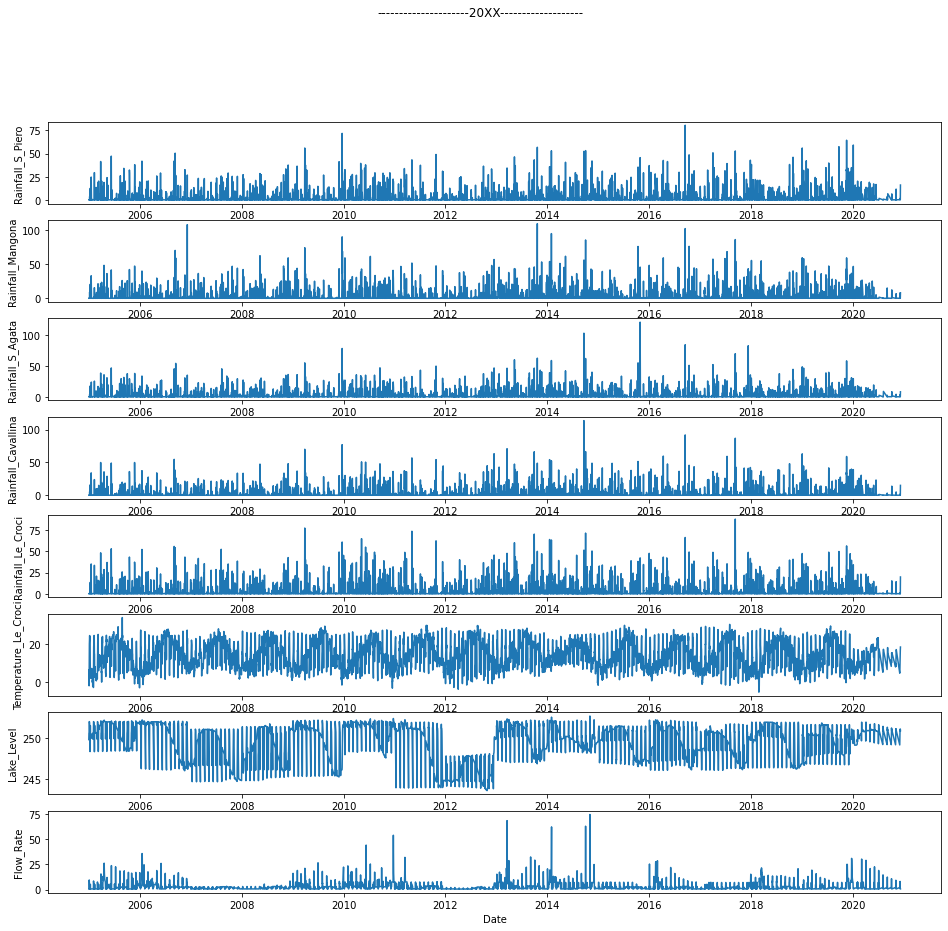

In [6]:
visual(lake)

# Takeaway
I think the patterns are a little lost in the noise. I am going to try resampling on a monthly basis

# Monthly

In [7]:
lake_m = lake.resample('M').mean()

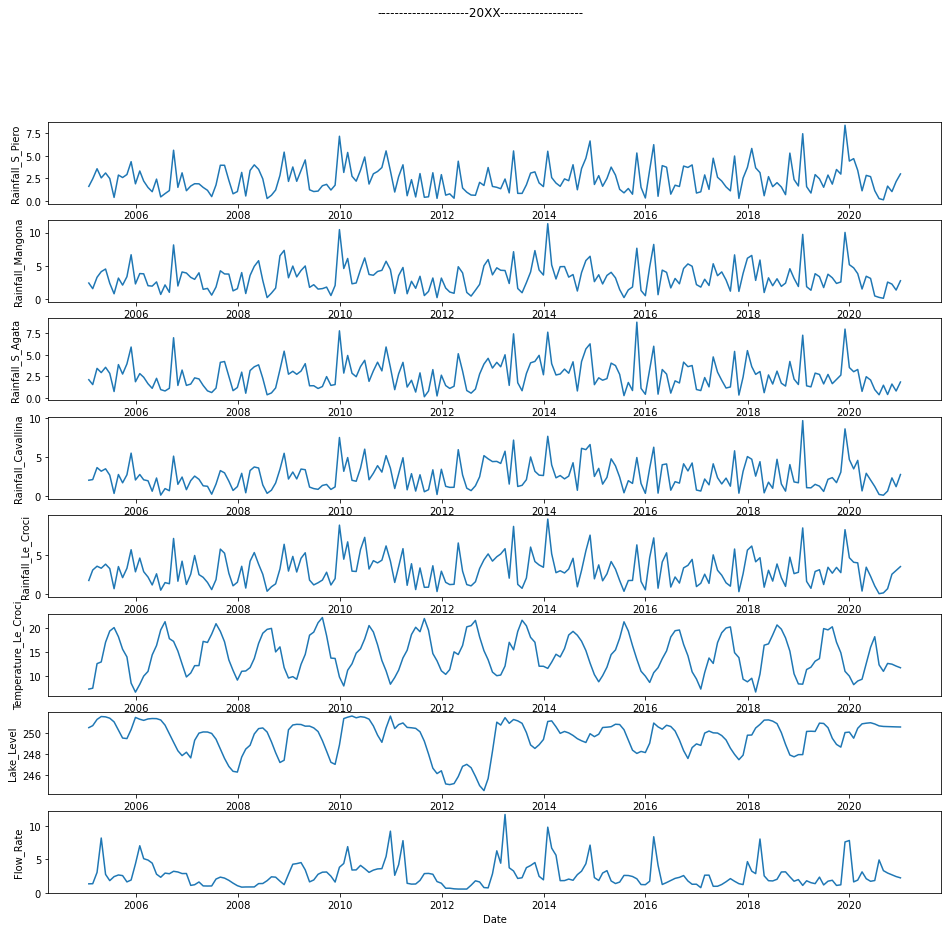

In [8]:
visual(lake_m)

<AxesSubplot:ylabel='Date'>

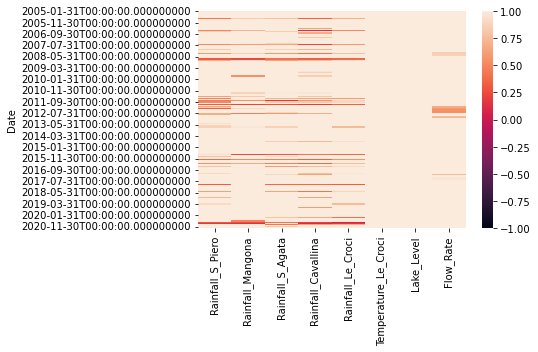

In [9]:
sns.heatmap(lake_m, vmin = -1, vmax = 1)

In [10]:
# difficult to see the variations, I will try 3M boxes

In [11]:
lake_3m = lake.resample('3M').mean()

<AxesSubplot:ylabel='Date'>

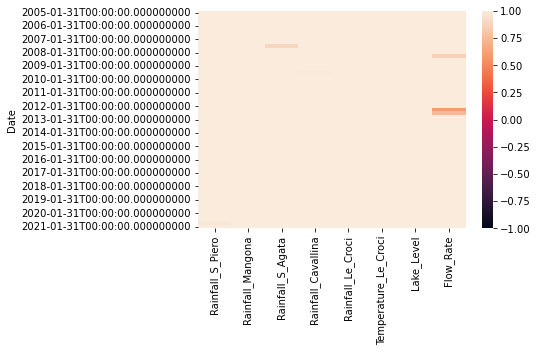

In [12]:
sns.heatmap(lake_3m, vmin = -1, vmax = 1)

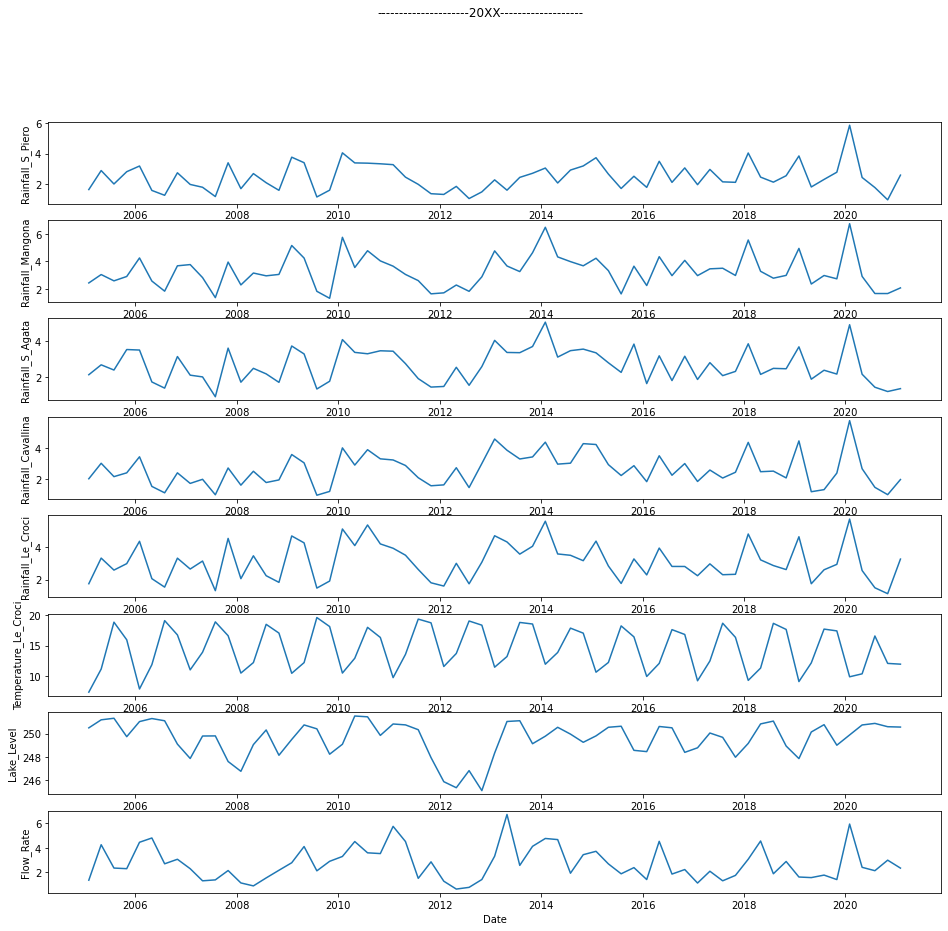

In [13]:
visual(lake_3m)

# Takeaway
# 3m smoothes the data out too much in my opinion

# Look at the data on a year by year basis

In [14]:
l = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

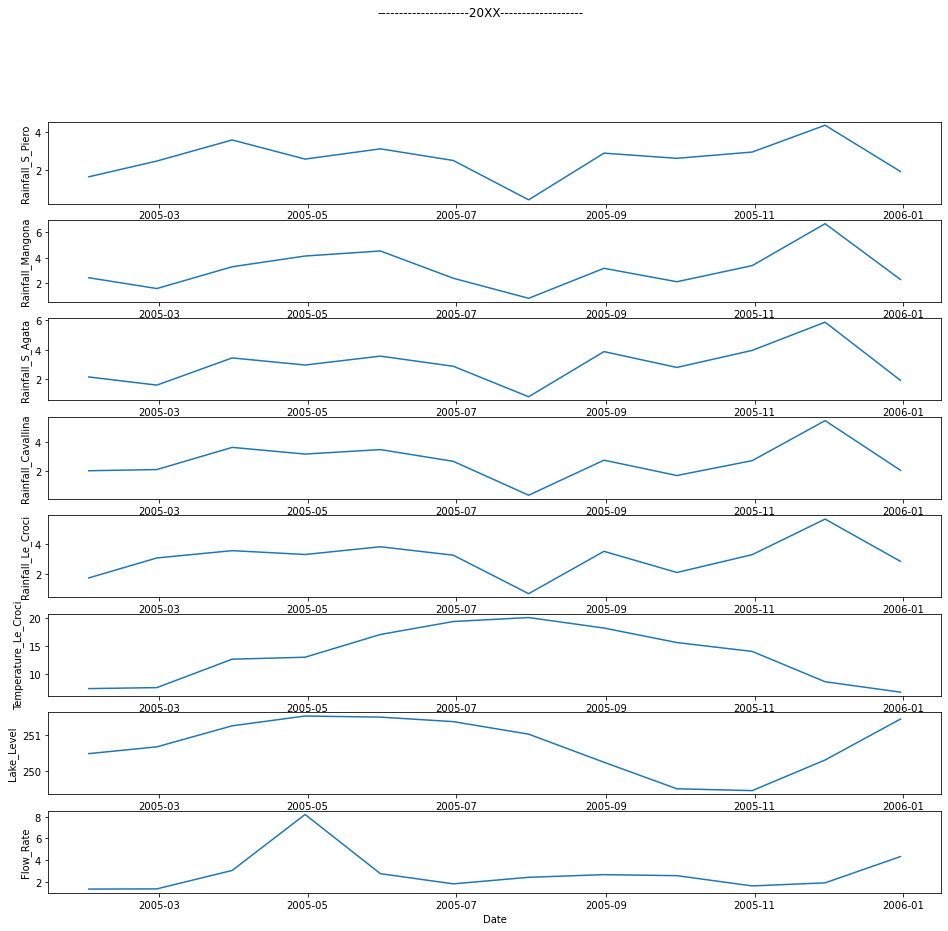

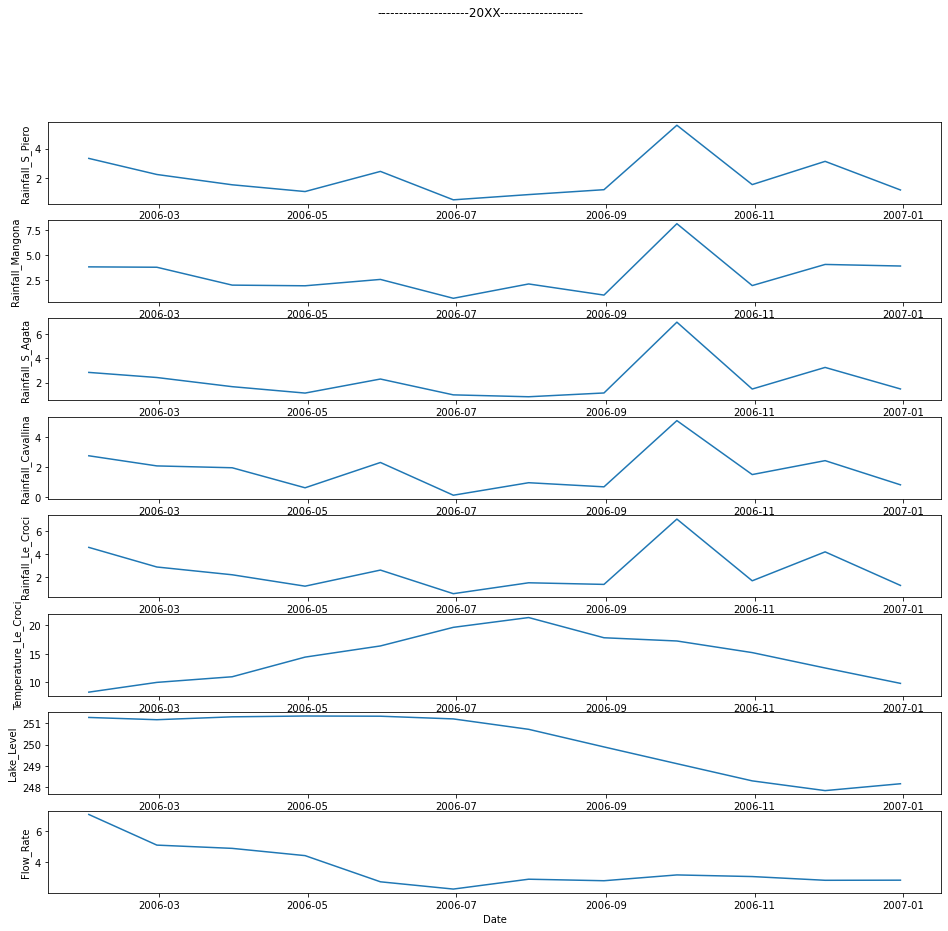

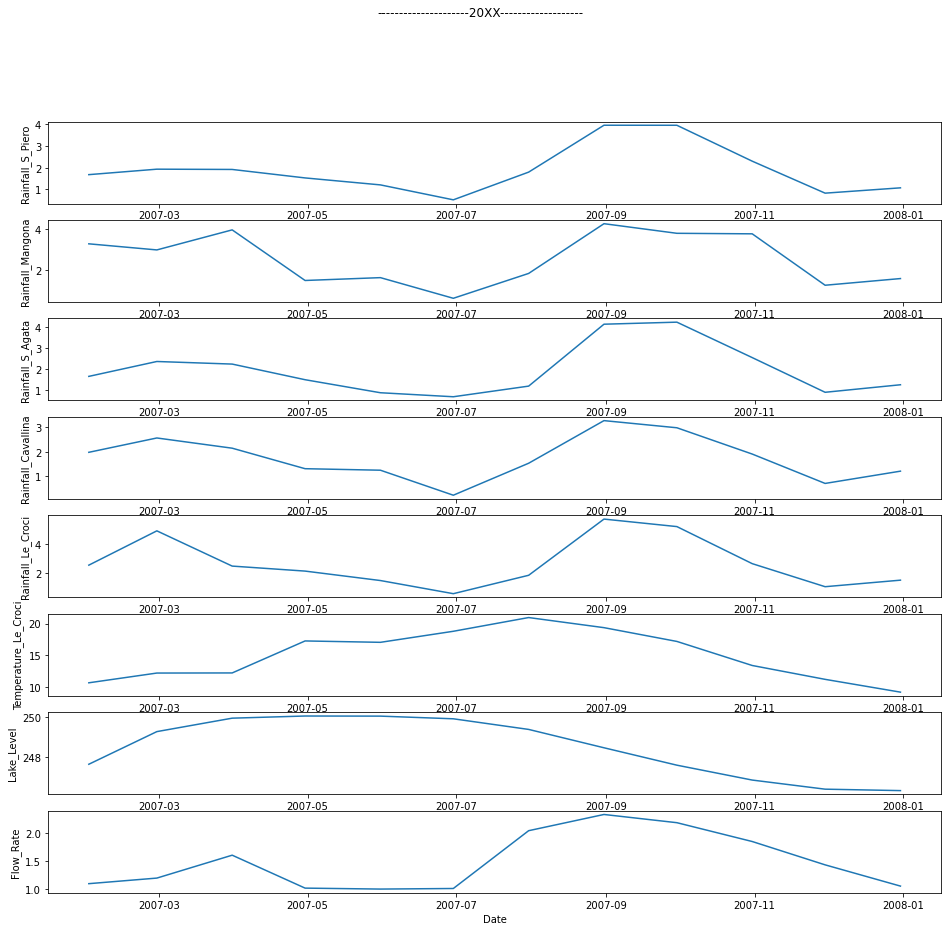

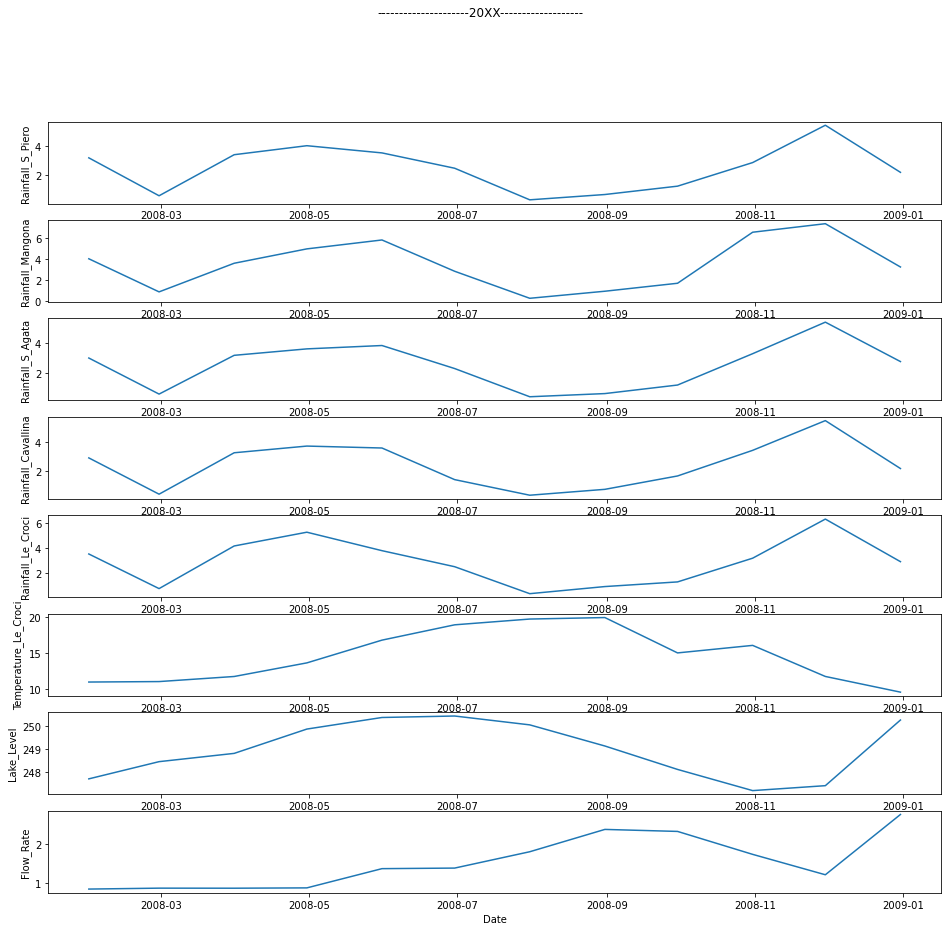

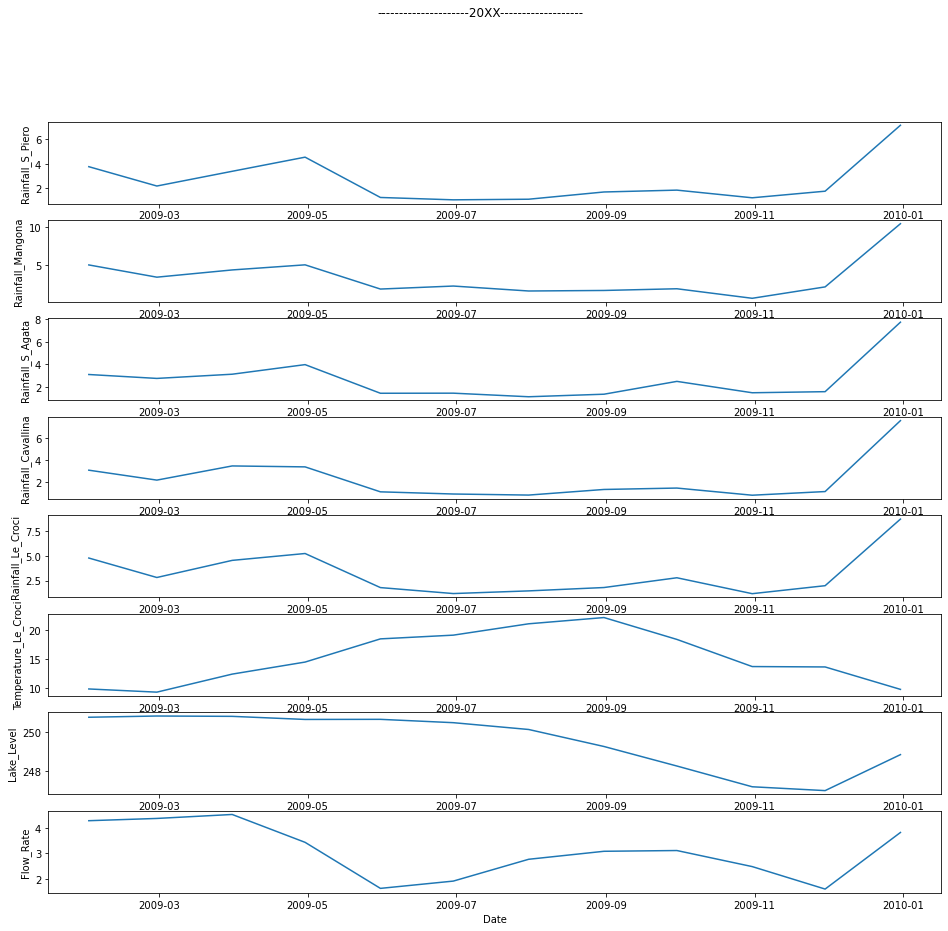

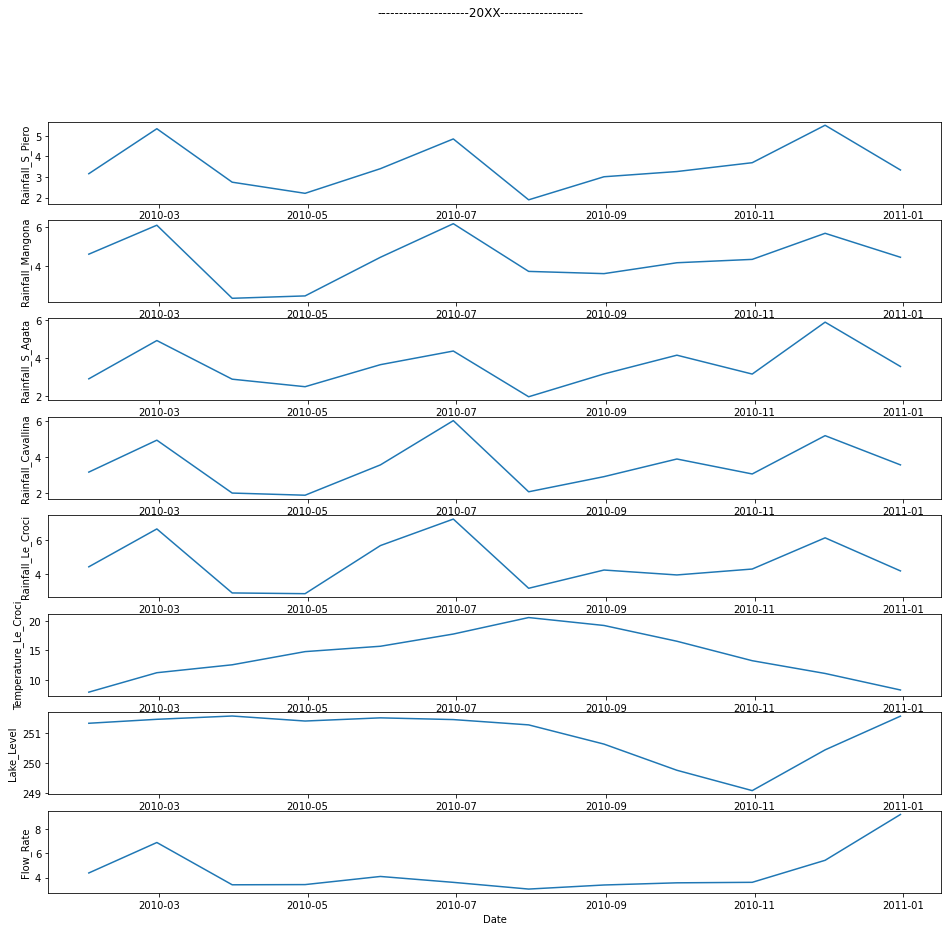

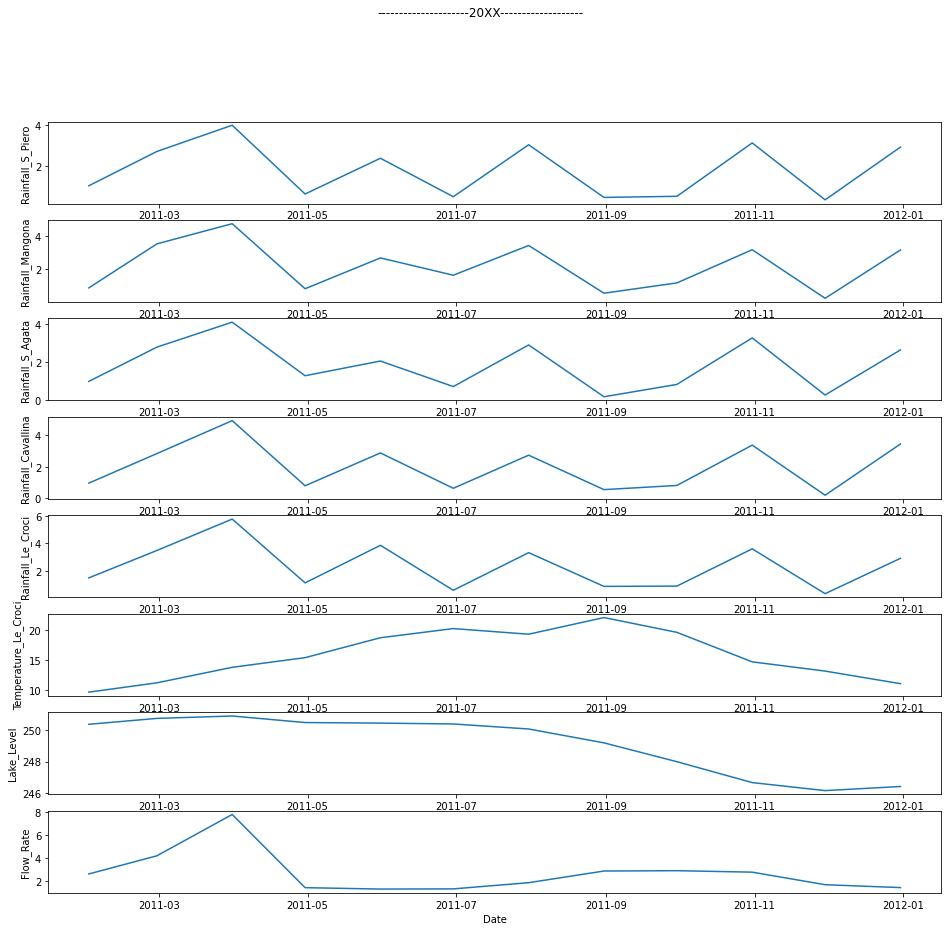

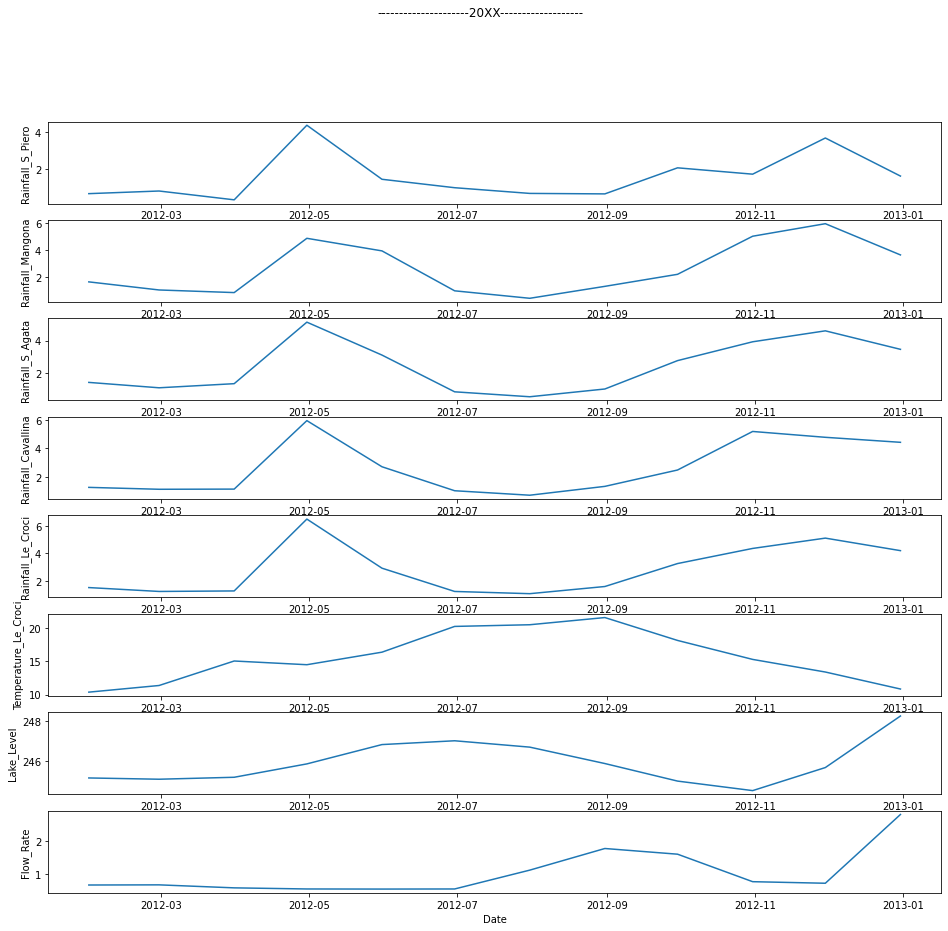

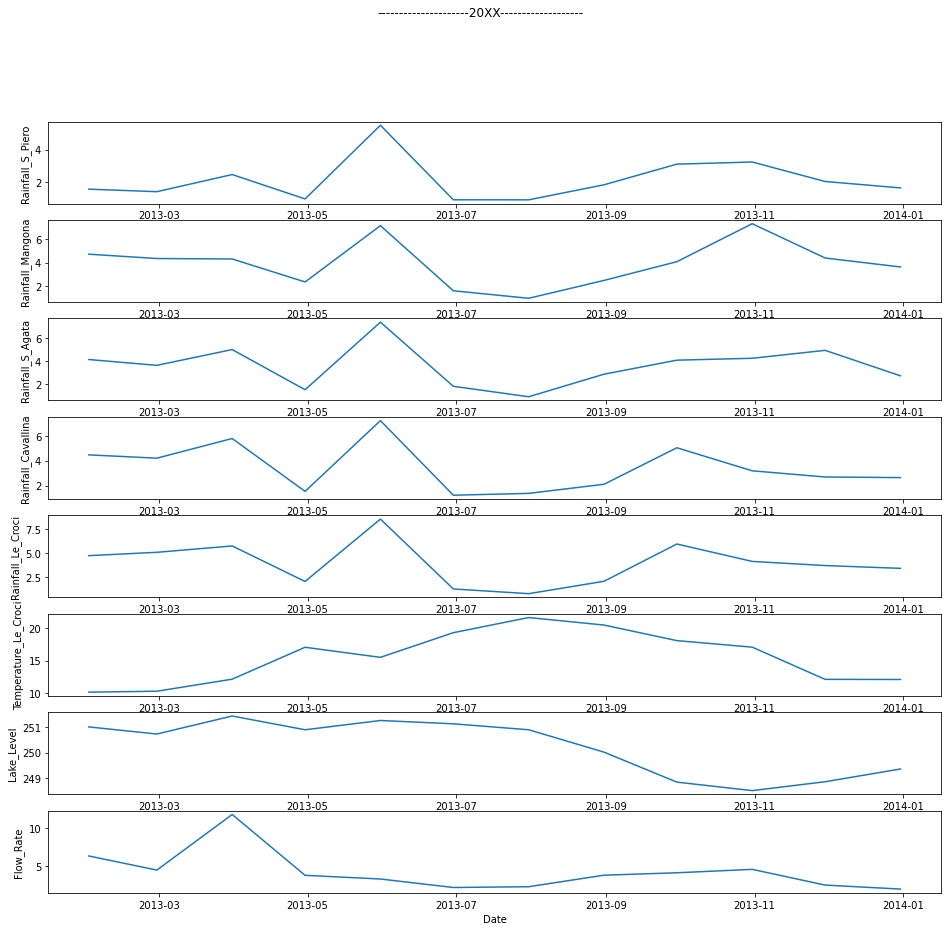

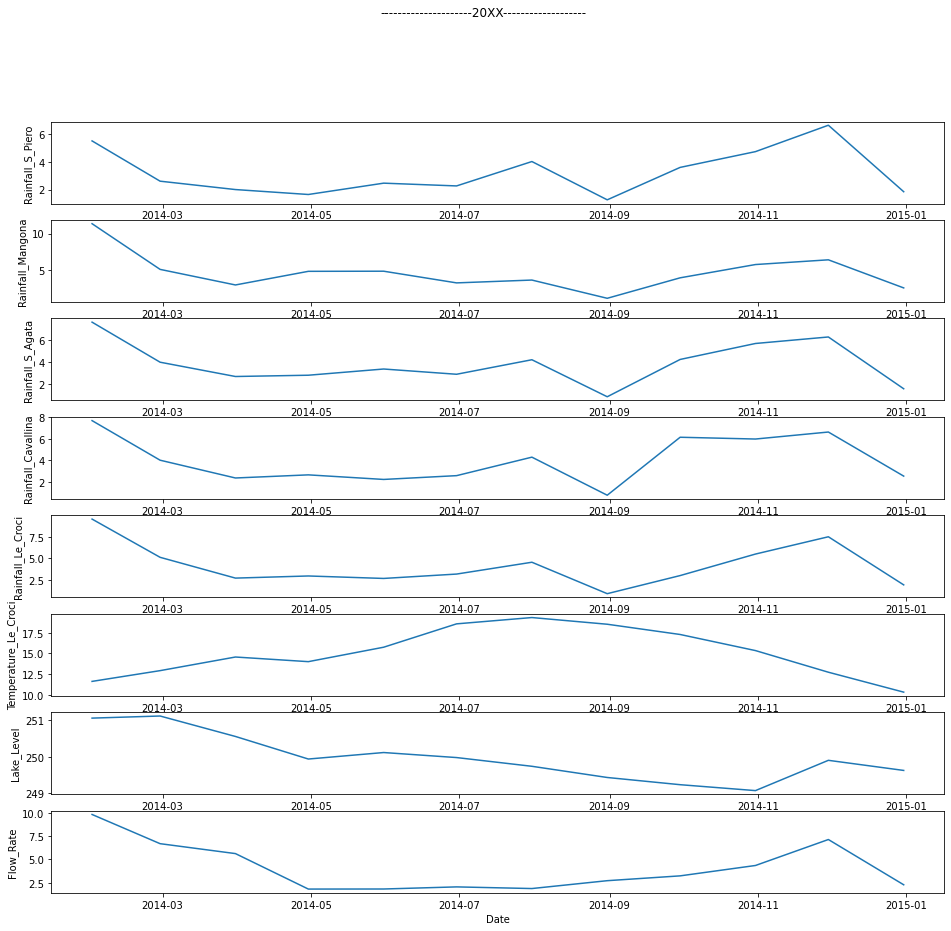

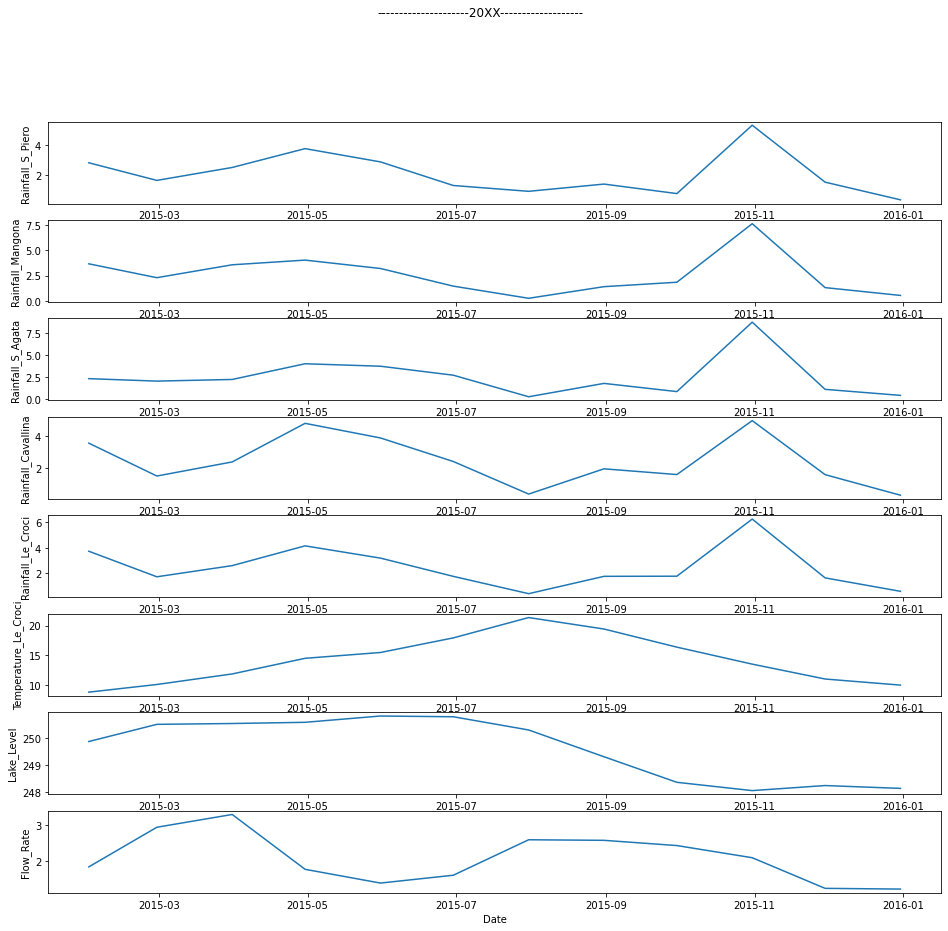

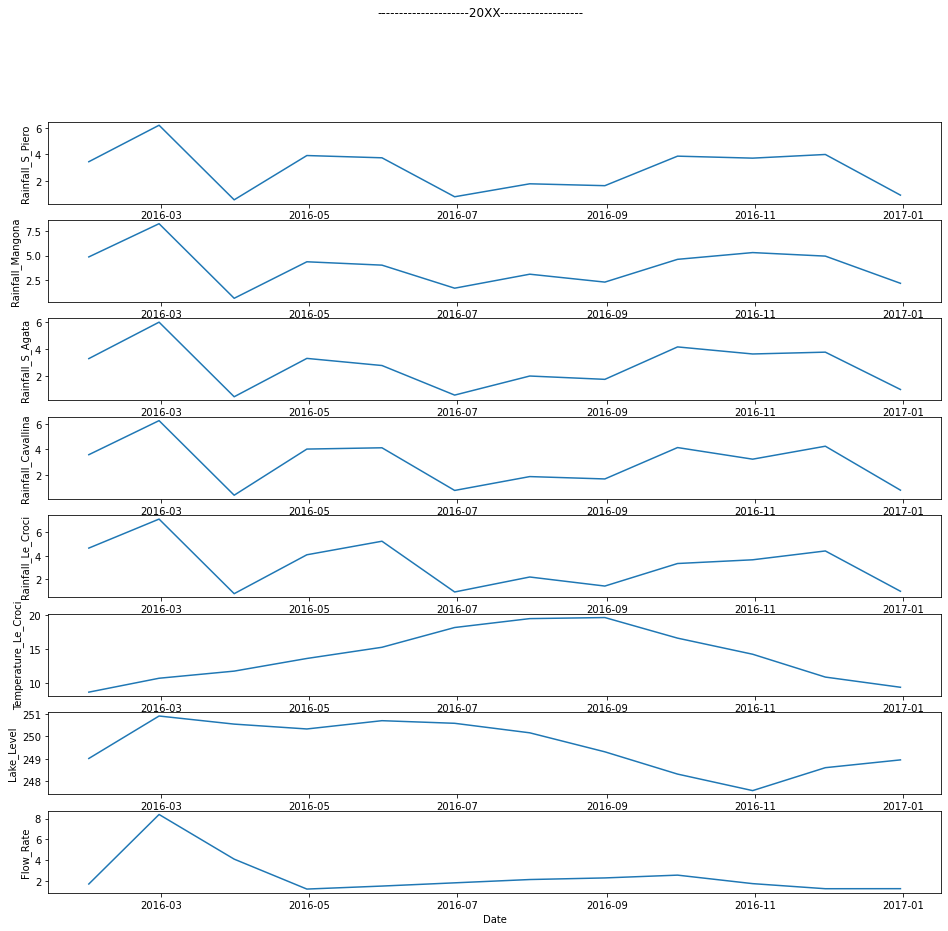

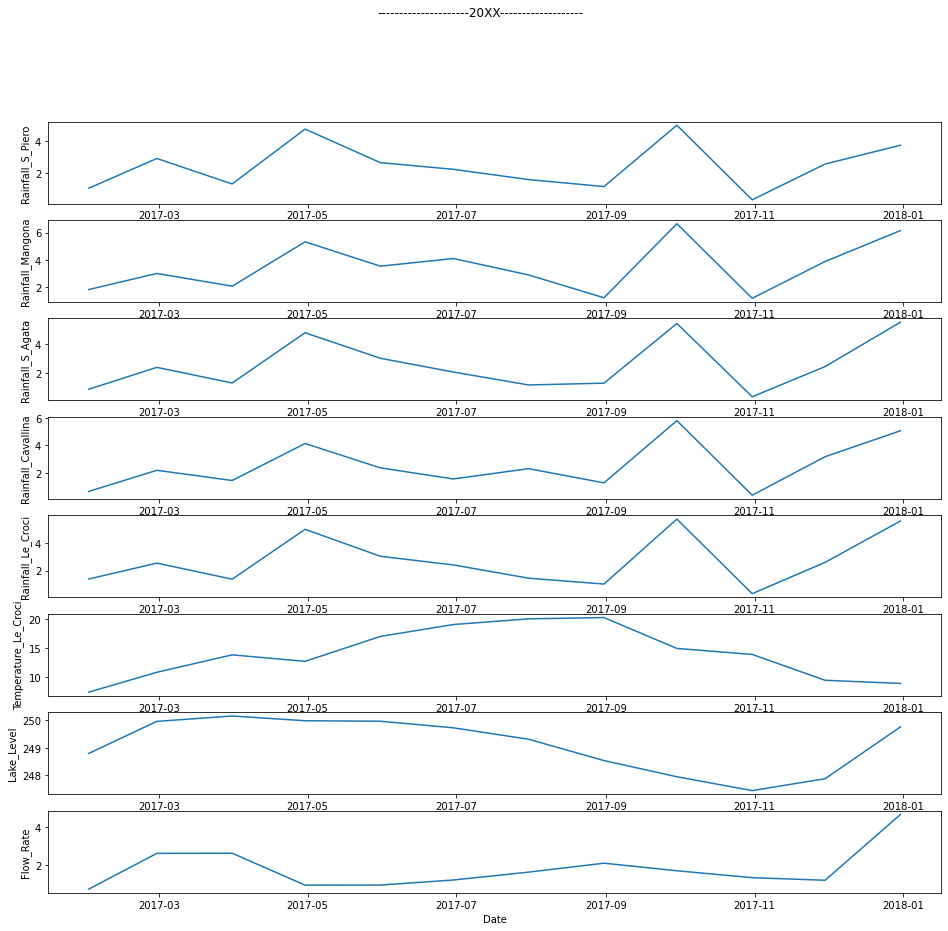

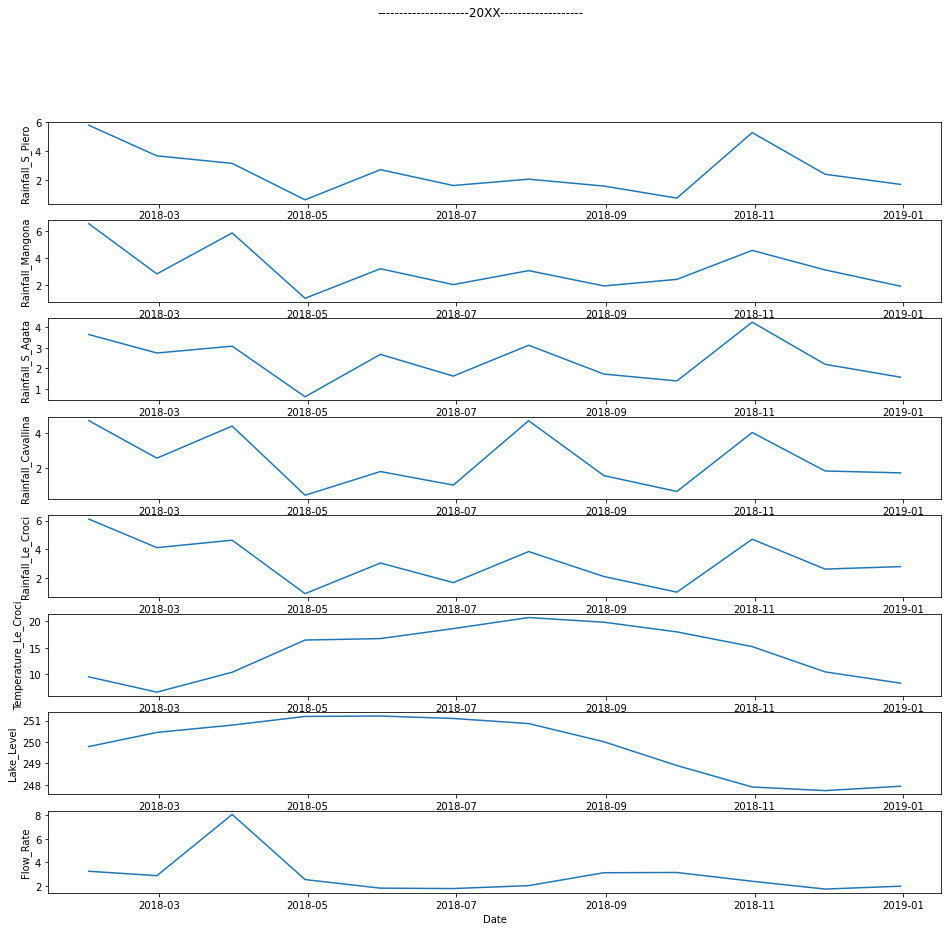

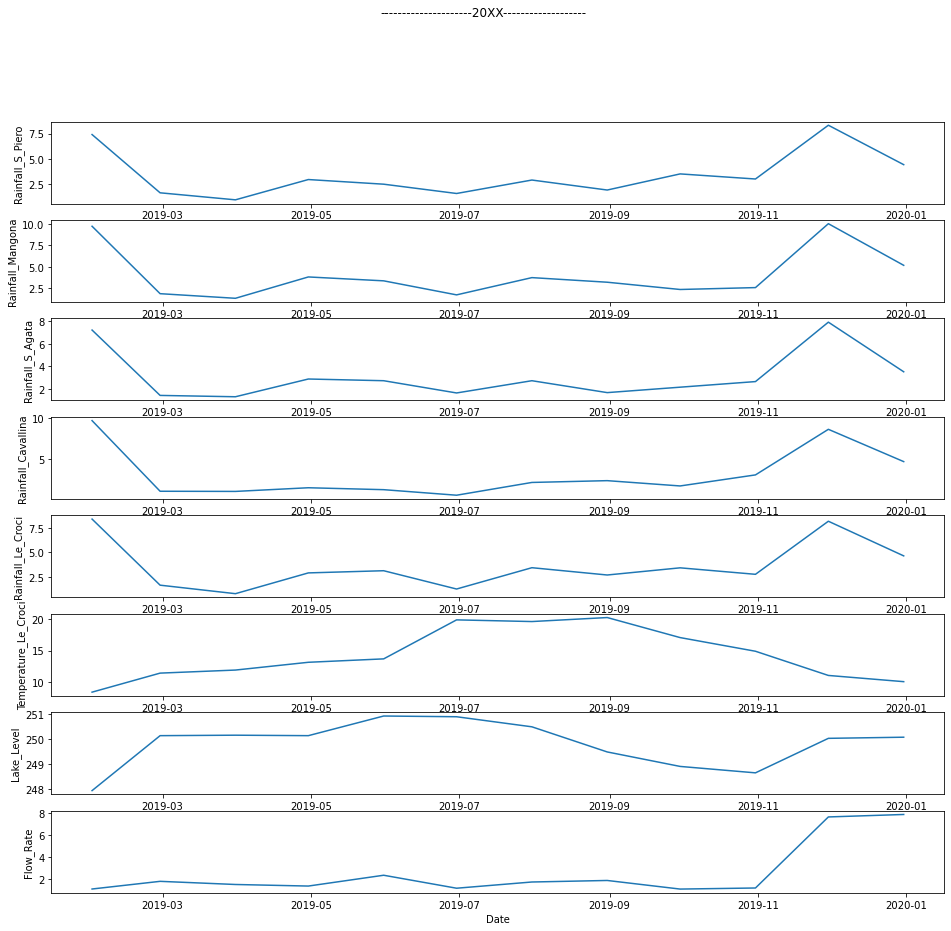

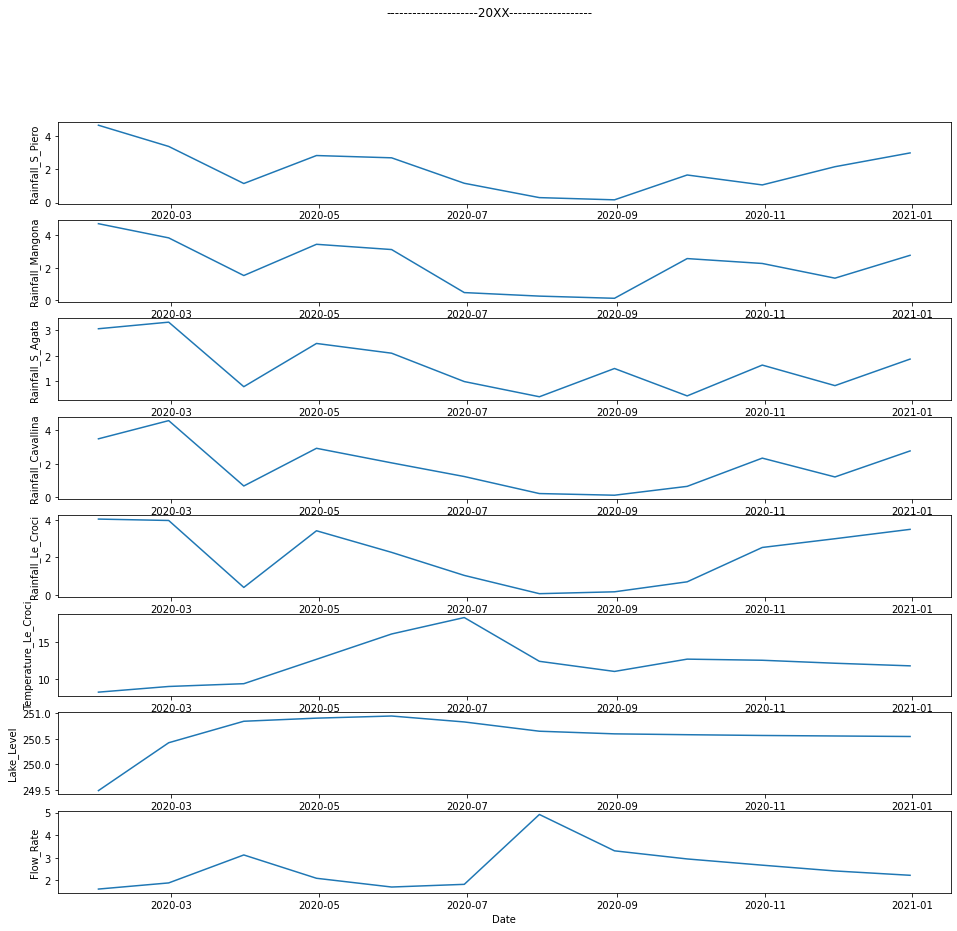

In [15]:
for i in l:
    n = '20'+ i
    m = lake[(lake.index >= n+'-01-01') & (lake.index <= n+'-12-31')]
    o = m.resample('M').mean()
    visual(o)
    

# Takeaway

Shift: \
2005-3M \
2006-4M-T \
2008 - 3M rain, 3MT \
2015-2020 also 3M
### I'm going to shift the graphs 3-months since it appears there is a delay time of 3 months from the rain and temperature effect on lake level


In [16]:
lake.columns

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

# Stats Testing

# I have all continuous variables so I will use Spearman or Pearson
# Spearman is better with monotonic data so I choose that one

In [17]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake.Lake_Level, lake[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=-0.0202731031820558, pvalue=0.12725270310762363)
Rainfall_Mangona
SpearmanrResult(correlation=0.03272778705061098, pvalue=0.01380397456019598)
Rainfall_S_Agata
SpearmanrResult(correlation=0.012918040883941438, pvalue=0.33120554647019973)
Rainfall_Cavallina
SpearmanrResult(correlation=0.013189599078239522, pvalue=0.3211405938008406)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.008057910057613043, pvalue=0.5444507014107909)
Temperature_Le_Croci
SpearmanrResult(correlation=0.034402559821438215, pvalue=0.009642257913187863)
Lake_Level
SpearmanrResult(correlation=1.0, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.2698533780412611, pvalue=5.005886458834358e-95)


# 3 Month Shift
3 months is appoximately 90 days

In [18]:
lake_s = acquire_p.get_bilancino_data()

In [19]:
lake_s = acquire_p.prepare(lake_s)

In [20]:
lake_s[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']] = lake_s[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']].shift(periods = 90, fill_value=0)

In [21]:
lake_s.resample('M').sum()

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Date                                                               
2005-01-31               0.0               0.0               0.0   
2005-02-28               0.0               0.0               0.0   
2005-03-31               0.0               0.0               0.0   
2005-04-30              50.8              75.2              66.0   
2005-05-31              69.2              44.2              44.0   
...                      ...               ...               ...   
2020-08-31               6.2               6.6               9.0   
2020-09-30              16.2               4.2               4.2   
2020-10-31              16.2              21.8              17.0   
2020-11-30              14.6              18.0              14.6   
2020-12-31               9.8              10.4               8.2   

            Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
Date                                                                      
2005-01-31                 0.0                0.0                  0.00   
2005-02-28                 0.0                0.0                  0.00   
2005-03-31                 0.0                0.0                  0.00   
2005-04-30                63.0               54.0                225.10   
2005-05-31                59.2               85.8                218.80   
...                        ...                ...                   ...   
2020-08-31                 1.0                1.6                 26.55   
2020-09-30                 0.8                0.0                 49.25   
2020-10-31                27.6               27.6                 70.35   
2020-11-30                17.6               20.4                 77.80   
2020-12-31                 7.0                6.8                 78.30   

            Lake_Level  Flow_Rate  
Date                               
2005-01-31     7764.91      41.20  
2005-02-28     7018.77      37.70  
2005-03-31     7789.03      94.40  
2005-04-30     7545.99     246.00  
2005-05-31     7796.57      85.10  
...                ...        ...  
2020-08-31     1503.57      19.85  
2020-09-30     1503.47      17.70  
2020-10-31     1503.38      16.05  
2020-11-30     1503.32      14.52  
2020-12-31     1503.26      13.37  

[192 rows x 8 columns]

In [22]:
lake.resample('M').sum()

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Date                                                               
2005-01-31              50.8              75.2              66.0   
2005-02-28              69.0              44.2              44.0   
2005-03-31             110.6             102.0             106.4   
2005-04-30              77.0             124.0              88.4   
2005-05-31              96.2             140.4             110.2   
...                      ...               ...               ...   
2020-08-31               1.0               0.8               9.0   
2020-09-30              10.0              15.4               2.6   
2020-10-31               6.4              13.6               9.8   
2020-11-30              13.0               8.2               5.0   
2020-12-31              18.0              16.6              11.2   

            Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
Date                                                                      
2005-01-31                63.0               54.0                226.20   
2005-02-28                59.2               85.8                209.30   
2005-03-31               113.4              110.0                390.95   
2005-04-30                95.8               98.8                388.90   
2005-05-31               108.6              118.0                529.35   
...                        ...                ...                   ...   
2020-08-31                 0.6                1.0                 66.00   
2020-09-30                 3.8                4.2                 75.90   
2020-10-31                14.0               15.2                 75.00   
2020-11-30                 7.2               18.0                 72.60   
2020-12-31                16.6               21.0                 70.50   

            Lake_Level  Flow_Rate  
Date                               
2005-01-31     7764.91      41.20  
2005-02-28     7018.77      37.70  
2005-03-31     7789.03      94.40  
2005-04-30     7545.99     246.00  
2005-05-31     7796.57      85.10  
...                ...        ...  
2020-08-31     1503.57      19.85  
2020-09-30     1503.47      17.70  
2020-10-31     1503.38      16.05  
2020-11-30     1503.32      14.52  
2020-12-31     1503.26      13.37  

[192 rows x 8 columns]

In [23]:
lake_s.head(91)

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Date                                                               
2005-01-01               0.0               0.0               0.0   
2005-01-02               0.0               0.0               0.0   
2005-01-03               0.0               0.0               0.0   
2005-01-04               0.0               0.0               0.0   
2005-01-05               0.0               0.0               0.0   
...                      ...               ...               ...   
2005-03-28               0.0               0.0               0.0   
2005-03-29               0.0               0.0               0.0   
2005-03-30               0.0               0.0               0.0   
2005-03-31               0.0               0.0               0.0   
2005-04-01               0.0               0.0               0.0   

            Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
Date                                                                      
2005-01-01                 0.0                0.0                   0.0   
2005-01-02                 0.0                0.0                   0.0   
2005-01-03                 0.0                0.0                   0.0   
2005-01-04                 0.0                0.0                   0.0   
2005-01-05                 0.0                0.0                   0.0   
...                        ...                ...                   ...   
2005-03-28                 0.0                0.0                   0.0   
2005-03-29                 0.0                0.0                   0.0   
2005-03-30                 0.0                0.0                   0.0   
2005-03-31                 0.0                0.0                   0.0   
2005-04-01                 0.0                0.0                   6.2   

            Lake_Level  Flow_Rate  
Date                               
2005-01-01      249.84        0.6  
2005-01-02      250.63        0.6  
2005-01-03      250.72        0.6  
2005-01-04      252.07        9.5  
2005-01-05      252.05        6.5  
...                ...        ...  
2005-03-28      252.16       15.0  
2005-03-29      252.14       15.5  
2005-03-30      252.11       12.7  
2005-03-31      252.09       10.5  
2005-04-01      249.91        0.6  

[91 rows x 8 columns]

In [24]:
lake_s = lake_s[lake_s.index >= '2005-04-01']

In [25]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake_s.Lake_Level, lake_s[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=0.0761859250935103, pvalue=1.2487042427304309e-08)
Rainfall_Mangona
SpearmanrResult(correlation=0.09433303260090985, pvalue=1.7327396071262336e-12)
Rainfall_S_Agata
SpearmanrResult(correlation=0.09335268594893713, pvalue=2.9345710697774053e-12)
Rainfall_Cavallina
SpearmanrResult(correlation=0.08224568590843814, pvalue=7.884566333711997e-10)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.09320484926319125, pvalue=3.1757487164447635e-12)
Temperature_Le_Croci
SpearmanrResult(correlation=-0.2807409125072632, pvalue=2.093661363869769e-101)
Lake_Level
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.27469487057483755, pvalue=5.370344821584501e-97)


# Concerns for sparse matrix

In [31]:
lake_s.describe().round(2)

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
count           5570.00           5570.00           5570.00   
mean               2.49              3.36              2.72   
std                6.76              9.02              7.32   
min                0.00              0.00              0.00   
25%                0.00              0.00              0.00   
50%                0.00              0.00              0.00   
75%                0.80              1.40              1.20   
max               80.60            110.00            120.20   

       Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
count             5570.00            5570.00               5570.00   
mean                 2.68               3.16                 14.57   
std                  7.76               8.14                  6.96   
min                  0.00               0.00                 -5.35   
25%                  0.00               0.00                  9.05   
50%                  0.00               0.00                 14.40   
75%                  0.40               1.20                 20.20   
max                113.60              88.40                 34.00   

       Lake_Level  Flow_Rate  
count     5570.00    5570.00  
mean       249.48       2.73  
std          2.20       4.02  
min        243.53       0.45  
25%        247.84       0.60  
50%        250.15       1.50  
75%        251.28       3.00  
max        252.76      74.65

# Takeaway
based on stats testing and high amounts of zeros in data, 
I intend to comibne Rainfall Mangona, Agata, and Le_Croci

I will drop Rainfall S_Piero and Cavallina

In [32]:
lake_s['avg_rain'] = (lake_s.Rainfall_Mangona + lake_s.Rainfall_S_Agata + lake_s.Rainfall_Le_Croci)/3

In [35]:
cat_col = lake_s.columns

In [36]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake_s.Lake_Level, lake_s[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=0.0761859250935103, pvalue=1.2487042427304309e-08)
Rainfall_Mangona
SpearmanrResult(correlation=0.09433303260090985, pvalue=1.7327396071262336e-12)
Rainfall_S_Agata
SpearmanrResult(correlation=0.09335268594893713, pvalue=2.9345710697774053e-12)
Rainfall_Cavallina
SpearmanrResult(correlation=0.08224568590843814, pvalue=7.884566333711997e-10)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.09320484926319125, pvalue=3.1757487164447635e-12)
Temperature_Le_Croci
SpearmanrResult(correlation=-0.2807409125072632, pvalue=2.093661363869769e-101)
Lake_Level
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.27469487057483755, pvalue=5.370344821584501e-97)
avg_rain
SpearmanrResult(correlation=0.10165730023521762, pvalue=2.8504404739023015e-14)


# Spliting before modeling or learning 

16 years of data

Human split \
9 years to train (55%) \
4 years to validate (25%) \
3 years to test (20%)


In [39]:
lake_s.columns

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate', 'avg_rain'],
      dtype='object')

In [37]:
lake_s.head()

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Date                                                               
2005-04-01               0.0               0.0               0.0   
2005-04-02               0.0               0.0               0.0   
2005-04-03               0.0               0.0               0.0   
2005-04-04               0.0               0.0               0.0   
2005-04-05               0.0               0.0               0.0   

            Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
Date                                                                      
2005-04-01                 0.0                0.0                  6.20   
2005-04-02                 0.0                0.0                  4.55   
2005-04-03                 0.0                0.0                 -2.00   
2005-04-04                 0.0                0.0                 12.45   
2005-04-05                 0.0                0.0                 20.00   

            Lake_Level  Flow_Rate  avg_rain  
Date                                         
2005-04-01      249.91        0.6       0.0  
2005-04-02      250.64        0.6       0.0  
2005-04-03      250.74        0.6       0.0  
2005-04-04      252.05        6.5       0.0  
2005-04-05      252.04        4.4       0.0

In [42]:
mod_col = lake_s.drop(columns = ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci'])

In [47]:
mod_col.head()

Temperature_Le_Croci  Lake_Level  Flow_Rate  avg_rain
Date                                                             
2005-04-01                  6.20      249.91        0.6       0.0
2005-04-02                  4.55      250.64        0.6       0.0
2005-04-03                 -2.00      250.74        0.6       0.0
2005-04-04                 12.45      252.05        6.5       0.0
2005-04-05                 20.00      252.04        4.4       0.0

In [44]:
train = mod_col[mod_col.index < '2014-01-01']
validate = mod_col[(mod_col.index >= '2014-01-01') & (mod_col.index < '2018-01-01')]
test = mod_col[mod_col.index >= '2018-01-01']

In [46]:
trainx = train.drop(columns = 'Lake_Level')
trainy = train.Lake_Level

validatex = validate.drop(columns = 'Lake_Level')
validatey = validate.Lake_Level

testx = test.drop(columns = 'Lake_Level')
testy = test.Lake_Level

In [48]:
train.shape, validate.shape, test.shape

((3197, 4), (1461, 4), (912, 4))

In [50]:
trainx.columns

Index(['Temperature_Le_Croci', 'Flow_Rate', 'avg_rain'], dtype='object')

In [53]:
trainy.head()

Date
2005-04-01    249.91
2005-04-02    250.64
2005-04-03    250.74
2005-04-04    252.05
2005-04-05    252.04
Name: Lake_Level, dtype: float64